## Importacion de Datos

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.reset_option("display.max_rows")
pd.set_option('display.max_columns', None)
filename = 'Data2024.csv'
columns = ['fecha', 'turno', 'horas_operacion', 'toneladas', 'au_cabeza', 'ag_cabeza', 'pb_cabeza', 'zn_cabeza', 'fe_cabeza', 'cu_cabeza', 'au_concentrado_pb', 'ag_concentrado_pb', 'pb_concentrado_pb', 'zn_concentrado_pb', 'fe_concentrado_pb', 'cu_concentrado_pb', 'au_colas_pb', 'ag_colas_pb', 'pb_colas_pb', 'zn_colas_pb', 'fe_colas_pb', 'cu_colas_pb', 'au_concentrado_zn', 'ag_concentrado_zn', 'pb_concentrado_zn', 'zn_concentrado_zn', 'fe_concentrado_zn', 'cu_concentrado_zn', 'au_colas_zn', 'ag_colas_zn', 'pb_colas_zn', 'zn_colas_zn', 'fe_colas_zn', 'cu_colas_zn', 'au_concentrado_fe', 'ag_concentrado_fe', 'pb_concentrado_fe', 'zn_concentrado_fe', 'fe_concentrado_fe', 'cu_concentrado_fe', 'au_colas_fe', 'ag_colas_fe', 'pb_colas_fe', 'zn_colas_fe', 'fe_colas_fe', 'cu_colas_fe']
dataFrame = pd.read_csv(filename, names=columns, header=None, index_col=False)

## Analisis de datos faltantes

In [298]:
missing_values = dataFrame.isnull().sum()
missing_values

fecha                  0
turno                  0
horas_operacion      117
toneladas              2
au_cabeza              0
ag_cabeza              0
pb_cabeza              0
zn_cabeza              0
fe_cabeza              0
cu_cabeza              0
au_concentrado_pb      0
ag_concentrado_pb      0
pb_concentrado_pb      0
zn_concentrado_pb      0
fe_concentrado_pb      0
cu_concentrado_pb      0
au_colas_pb            2
ag_colas_pb            2
pb_colas_pb            2
zn_colas_pb            2
fe_colas_pb            2
cu_colas_pb            2
au_concentrado_zn      0
ag_concentrado_zn      0
pb_concentrado_zn      0
zn_concentrado_zn      0
fe_concentrado_zn      0
cu_concentrado_zn      0
au_colas_zn            1
ag_colas_zn            1
pb_colas_zn            1
zn_colas_zn            1
fe_colas_zn            1
cu_colas_zn            1
au_concentrado_fe      4
ag_concentrado_fe      4
pb_concentrado_fe      4
zn_concentrado_fe      4
fe_concentrado_fe      4
cu_concentrado_fe      4


## Horas operacion sera llenado con regresion

In [300]:
zero_counts = (dataFrame == 0).sum()
zero_counts

fecha                  0
turno                  0
horas_operacion        0
toneladas              2
au_cabeza              1
ag_cabeza              1
pb_cabeza              1
zn_cabeza              1
fe_cabeza              1
cu_cabeza              1
au_concentrado_pb      2
ag_concentrado_pb      1
pb_concentrado_pb      1
zn_concentrado_pb      1
fe_concentrado_pb      1
cu_concentrado_pb      2
au_colas_pb            0
ag_colas_pb            0
pb_colas_pb            0
zn_colas_pb            0
fe_colas_pb            0
cu_colas_pb            3
au_concentrado_zn      0
ag_concentrado_zn      0
pb_concentrado_zn      0
zn_concentrado_zn      0
fe_concentrado_zn      0
cu_concentrado_zn      0
au_colas_zn            0
ag_colas_zn            0
pb_colas_zn            0
zn_colas_zn            0
fe_colas_zn            0
cu_colas_zn           29
au_concentrado_fe    232
ag_concentrado_fe    232
pb_concentrado_fe    232
zn_concentrado_fe    232
fe_concentrado_fe    232
cu_concentrado_fe    232


In [302]:
df_prueba = dataFrame.replace(0, np.nan)
# Conteo de ceros en las cocolumnas
zero_counts = (df_prueba == 0).sum()
zero_counts

fecha                0
turno                0
horas_operacion      0
toneladas            0
au_cabeza            0
ag_cabeza            0
pb_cabeza            0
zn_cabeza            0
fe_cabeza            0
cu_cabeza            0
au_concentrado_pb    0
ag_concentrado_pb    0
pb_concentrado_pb    0
zn_concentrado_pb    0
fe_concentrado_pb    0
cu_concentrado_pb    0
au_colas_pb          0
ag_colas_pb          0
pb_colas_pb          0
zn_colas_pb          0
fe_colas_pb          0
cu_colas_pb          0
au_concentrado_zn    0
ag_concentrado_zn    0
pb_concentrado_zn    0
zn_concentrado_zn    0
fe_concentrado_zn    0
cu_concentrado_zn    0
au_colas_zn          0
ag_colas_zn          0
pb_colas_zn          0
zn_colas_zn          0
fe_colas_zn          0
cu_colas_zn          0
au_concentrado_fe    0
ag_concentrado_fe    0
pb_concentrado_fe    0
zn_concentrado_fe    0
fe_concentrado_fe    0
cu_concentrado_fe    0
au_colas_fe          0
ag_colas_fe          0
pb_colas_fe          0
zn_colas_fe

In [305]:
# Eliminar filas donde todas las columnas numéricas son NaN
print(df_prueba.isnull().sum(axis=1))  # Revisa cuántos NaN tiene cada fila
df_prueba = df_prueba.dropna(how='all')
df_faltantes = df_prueba

0      12
1      12
2      12
3      12
4      12
       ..
647     0
648     0
649     0
650     0
651     0
Length: 652, dtype: int64


## Visualización y Eliminacion de Outliers

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt

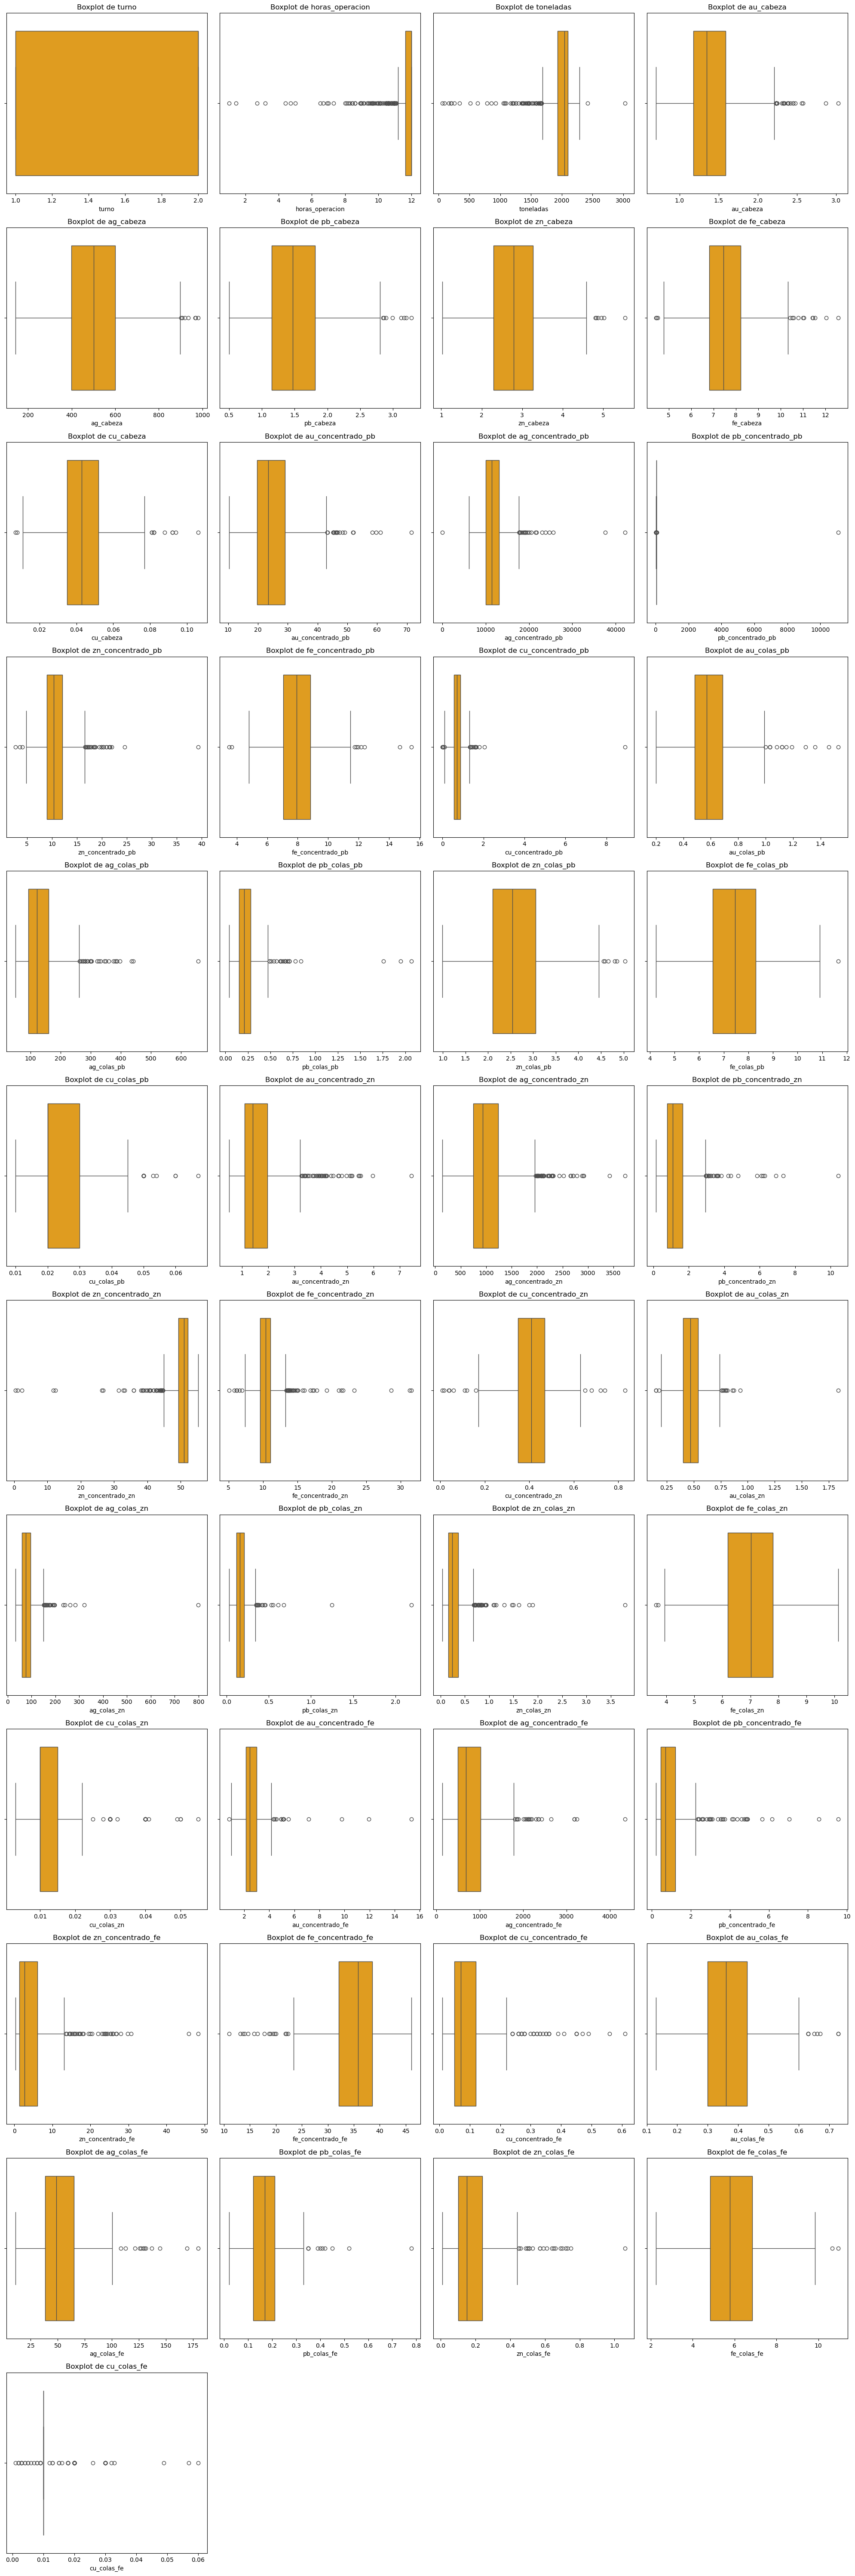

In [310]:
# Visualizacion de boxplots
columns = [col for col in df_prueba.columns if col != 'fecha']  # Excluye la columna 'fecha'

# Número de gráficos por fila
ncols = 4

# Calcular el número de filas necesarias
nrows = (len(columns) + ncols - 1) // ncols

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))

# Aplanar el array de axes para facilitar la iteración
axes = axes.flatten()

# Generar boxplots para cada columna
for i, col in enumerate(columns):
    sns.boxplot(x=df_prueba[col], ax=axes[i], color='orange')
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel(col)

# Ocultar los ejes vacíos si el número de columnas no es múltiplo de 3
for j in range(len(columns), nrows * ncols):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout()
plt.show()

In [312]:
# Conteo de outliers en cada columna
# Excluir la columna 'fecha' si está presente
columns_to_check = [col for col in df_prueba.columns if col != 'fecha']

# Mostrar el número de outliers por columna
for col in columns_to_check:
    # Calcular el IQR
    Q1 = df_prueba[col].quantile(0.25)  # Primer cuartil (10%)
    Q3 = df_prueba[col].quantile(0.75)  # Tercer cuartil (90%)
    IQR = Q3 - Q1  # Rango intercuartílico

    # Definir límites para detectar outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers_count = df_prueba[(df_prueba[col] < lower_bound) | (df_prueba[col] > upper_bound)].shape[0]
    
    # Mostrar el número de outliers
    print(f"Número de outliers en '{col}': {outliers_count}")

Número de outliers en 'turno': 0
Número de outliers en 'horas_operacion': 96
Número de outliers en 'toneladas': 61
Número de outliers en 'au_cabeza': 23
Número de outliers en 'ag_cabeza': 7
Número de outliers en 'pb_cabeza': 8
Número de outliers en 'zn_cabeza': 6
Número de outliers en 'fe_cabeza': 14
Número de outliers en 'cu_cabeza': 12
Número de outliers en 'au_concentrado_pb': 20
Número de outliers en 'ag_concentrado_pb': 24
Número de outliers en 'pb_concentrado_pb': 16
Número de outliers en 'zn_concentrado_pb': 30
Número de outliers en 'fe_concentrado_pb': 9
Número de outliers en 'cu_concentrado_pb': 22
Número de outliers en 'au_colas_pb': 13
Número de outliers en 'ag_colas_pb': 28
Número de outliers en 'pb_colas_pb': 22
Número de outliers en 'zn_colas_pb': 6
Número de outliers en 'fe_colas_pb': 1
Número de outliers en 'cu_colas_pb': 13
Número de outliers en 'au_concentrado_zn': 45
Número de outliers en 'ag_concentrado_zn': 43
Número de outliers en 'pb_concentrado_zn': 30
Número de

In [314]:
# Tamaño de la ventana (ajusta según tus datos)
# Parametro Importante a la hora de porbar la LSTM
window_size = 15

# Imputar outliers con la mediana móvil
for col in columns_to_check:
    Q1 = df_prueba[col].quantile(0.25)
    Q3 = df_prueba[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers
    outlier_mask = (df_prueba[col] < lower_bound) | (df_prueba[col] > upper_bound)

    # Imputar outliers con la mediana móvil
    df_prueba.loc[outlier_mask, col] = df_prueba[col].rolling(window=window_size, min_periods=1, center=True).median()

In [316]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Copia del dataset para experimentación
df_test = df_prueba.dropna()

# Columnas con valores faltantes
columnas_con_faltantes = df_test.columns[2:]

# Crear datos faltantes artificialmente (para evaluar imputación)
np.random.seed(42)
mask = np.random.rand(*df_test[columnas_con_faltantes].shape) < 0.1  # Simula 10% de datos faltantes
df_test_masked = df_test.copy()
df_test_masked[columnas_con_faltantes] = df_test_masked[columnas_con_faltantes].mask(mask)

# Estandarizar
scaler = StandardScaler()
df_test_masked[columnas_con_faltantes] = scaler.fit_transform(df_test_masked[columnas_con_faltantes])

# Evaluar distintos valores de k
errores = {}
for k in range(1, 21):  # Probar valores entre 1 y 20 vecinos
    imputer = KNNImputer(n_neighbors=k)
    df_imputed = imputer.fit_transform(df_test_masked[columnas_con_faltantes])

    # Desnormalizar
    df_imputed = scaler.inverse_transform(df_imputed)

    # Calcular el MAE para cada columna y promediar
    mae_total = 0
    for i, col in enumerate(columnas_con_faltantes):
        y_true = df_test[col][mask[:, i]]  # Valores reales
        y_pred = df_imputed[mask[:, i], i]  # Valores imputados
        mae_total += mean_absolute_error(y_true, y_pred)
    
    # Promediar el MAE
    mae_promedio = mae_total / len(columnas_con_faltantes)
    errores[k] = mae_promedio

# Mostrar el mejor k
mejor_k = min(errores, key=errores.get)
print(f"Mejor número de vecinos: {mejor_k} con MAE = {errores[mejor_k]}")


Mejor número de vecinos: 2 con MAE = 37.61927733891493


#### Relleno de Datos Faltantes con Machine Learning

Dado que el dataset contenía una gran cantidad de datos faltantes, se aplicó un algoritmo de **Machine Learning** para completar esos valores de manera eficiente.  

Se utilizó el algoritmo **K-Nearest Neighbors (KNN)**, el cual estima los valores faltantes basándose en los vecinos más cercanos dentro del conjunto de datos.  


In [319]:
# Estandarizacion de datos para KNN
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

columnas_con_faltantes = df_prueba.columns[2:]

scaler = StandardScaler() 
df_prueba[columnas_con_faltantes] = scaler.fit_transform(df_prueba[columnas_con_faltantes])

# Aplicar KNN Imputer
imputer = KNNImputer(n_neighbors=2)
df_prueba[columnas_con_faltantes] = imputer.fit_transform(df_prueba[columnas_con_faltantes])

# Desnormalizar (Usar el mismo scaler)
df_prueba[columnas_con_faltantes] = scaler.inverse_transform(df_prueba[columnas_con_faltantes])
df_prueba


,fecha,turno,horas_operacion,toneladas,au_cabeza,ag_cabeza,pb_cabeza,zn_cabeza,fe_cabeza,cu_cabeza,au_concentrado_pb,ag_concentrado_pb,pb_concentrado_pb,zn_concentrado_pb,fe_concentrado_pb,cu_concentrado_pb,au_colas_pb,ag_colas_pb,pb_colas_pb,zn_colas_pb,fe_colas_pb,cu_colas_pb,au_concentrado_zn,ag_concentrado_zn,pb_concentrado_zn,zn_concentrado_zn,fe_concentrado_zn,cu_concentrado_zn,au_colas_zn,ag_colas_zn,pb_colas_zn,zn_colas_zn,fe_colas_zn,cu_colas_zn,au_concentrado_fe,ag_concentrado_fe,pb_concentrado_fe,zn_concentrado_fe,fe_concentrado_fe,cu_concentrado_fe,au_colas_fe,ag_colas_fe,pb_colas_fe,zn_colas_fe,fe_colas_fe,cu_colas_fe
0,02/01/2024,1,10.80,1909.950,1.030,395.81,0.75,1.52,5.8110,0.032,35.08,14143.96,30.37,9.46,9.95,0.67,0.60,68.25,0.100,1.25,5.41,0.01,2.29,1193.58,1.12,48.200,10.800,0.38,0.49,65.42,0.14,0.370,5.11,0.02,2.460,495.945,0.37,1.275,35.3000,0.0550,0.360,35.200,0.150,0.135,5.0250,0.0100
1,02/01/2024,2,11.00,1736.900,1.040,350.60,0.77,1.49,5.2020,0.030,31.50,13517.71,33.27,8.80,8.62,0.73,0.69,72.49,0.090,1.54,5.50,0.02,2.16,918.97,0.85,48.890,10.710,0.41,0.45,38.75,0.06,0.190,4.98,0.01,2.450,481.505,0.63,1.685,37.2200,0.0500,0.445,29.300,0.170,0.145,4.8200,0.0100
2,03/01/2024,1,11.50,1955.000,1.500,386.74,1.30,1.95,6.4000,0.035,28.85,11565.34,37.18,9.46,8.59,0.69,0.70,71.96,0.110,1.73,6.01,0.02,2.47,943.45,0.89,48.890,10.890,0.45,0.55,44.21,0.09,0.210,5.71,0.01,2.655,725.520,0.90,2.575,36.8635,0.0595,0.460,31.290,0.110,0.085,3.9935,0.0095
3,03/01/2024,2,11.70,2068.400,1.920,308.41,1.09,1.85,6.3400,0.035,35.29,10725.18,38.21,10.53,9.14,0.73,0.58,54.28,0.110,1.67,5.94,0.01,1.72,750.92,0.68,49.260,10.520,0.41,0.53,33.32,0.08,0.160,5.41,0.01,2.040,381.740,0.36,1.350,33.0000,0.0600,0.365,29.755,0.110,0.100,4.4000,0.0100
4,04/01/2024,1,11.45,1857.100,1.140,286.74,0.83,1.78,5.4050,0.037,40.55,9049.98,42.39,11.16,8.39,0.88,0.69,67.57,0.100,1.81,6.13,0.02,2.42,851.95,0.80,47.200,10.900,0.45,0.53,33.90,0.07,0.260,5.34,0.01,2.355,411.935,0.33,1.020,36.7150,0.0400,0.295,25.710,0.115,0.115,3.9350,0.0100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,29/12/2024,2,11.73,1936.160,1.199,448.90,2.23,3.59,9.7315,0.071,17.80,9667.45,39.38,16.01,10.25,1.04,0.37,101.60,0.420,3.36,9.88,0.03,0.90,638.53,2.30,50.820,12.065,0.47,0.37,83.31,0.33,0.470,10.14,0.02,1.600,685.470,1.95,12.020,38.5500,0.1500,0.330,97.720,0.270,0.335,9.0900,0.0100
648,30/12/2024,1,10.07,1817.840,1.100,447.02,1.42,3.42,7.9970,0.049,11.58,6911.85,38.40,11.24,10.08,0.53,0.30,70.42,0.180,2.92,7.29,0.02,0.80,505.51,0.81,48.610,13.240,0.28,0.27,46.59,0.16,0.360,7.09,0.01,1.400,364.800,0.37,2.350,40.3700,0.0400,0.270,46.760,0.170,0.340,6.6200,0.0100
649,30/12/2024,2,11.95,2152.980,1.200,497.17,1.69,4.07,7.7090,0.052,12.60,7064.30,32.14,11.78,10.24,0.51,0.37,79.82,0.170,4.10,7.79,0.03,1.00,449.88,0.47,48.585,12.770,0.25,0.37,39.26,0.13,0.420,5.55,0.01,1.800,354.500,0.40,4.060,35.5200,0.0500,0.270,43.920,0.160,0.330,6.5000,0.0100
650,31/12/2024,1,10.07,1796.470,1.134,389.98,1.70,3.40,7.4310,0.071,15.83,7712.41,44.36,10.84,8.12,1.05,0.40,86.79,0.350,3.35,9.63,0.04,0.88,472.56,0.92,49.950,12.300,0.39,0.36,58.70,0.25,0.610,9.27,0.02,1.530,359.840,0.57,4.630,32.4400,0.0700,0.370,38.140,0.260,0.430,7.7700,0.0100


In [321]:
# Obtenemos las columnas que tienen valores nan
nan = df_prueba.isna().sum()
columnas_nan = nan[nan > 0]
columnas_nan

Series([], dtype: int64)

In [323]:
# Conteo de ceros en las cocolumnas
zero_counts = (df_prueba == 0).sum()
zero_counts

fecha                0
turno                0
horas_operacion      0
toneladas            0
au_cabeza            0
ag_cabeza            0
pb_cabeza            0
zn_cabeza            0
fe_cabeza            0
cu_cabeza            0
au_concentrado_pb    0
ag_concentrado_pb    0
pb_concentrado_pb    0
zn_concentrado_pb    0
fe_concentrado_pb    0
cu_concentrado_pb    0
au_colas_pb          0
ag_colas_pb          0
pb_colas_pb          0
zn_colas_pb          0
fe_colas_pb          0
cu_colas_pb          0
au_concentrado_zn    0
ag_concentrado_zn    0
pb_concentrado_zn    0
zn_concentrado_zn    0
fe_concentrado_zn    0
cu_concentrado_zn    0
au_colas_zn          0
ag_colas_zn          0
pb_colas_zn          0
zn_colas_zn          0
fe_colas_zn          0
cu_colas_zn          0
au_concentrado_fe    0
ag_concentrado_fe    0
pb_concentrado_fe    0
zn_concentrado_fe    0
fe_concentrado_fe    0
cu_concentrado_fe    0
au_colas_fe          0
ag_colas_fe          0
pb_colas_fe          0
zn_colas_fe

In [325]:
                          
# dataFrame = pd.read_csv(filename, names=columns, parse_dates=["fecha"], date_parser=parse_dates)


# Pasamos la columnas fecha a formato datetime
# Convertir la columna 'fecha' a formato datetime
df_prueba['fecha'] = pd.to_datetime(dataFrame['fecha'], format='%d/%m/%Y')

# Crear un índice único combinando fecha y turno
df_prueba['date_index'] = df_prueba['fecha'].astype(str) + '_' + df_prueba['turno'].astype(str)

# Establecer el nuevo índice único
df_prueba = df_prueba.set_index('date_index')

# Eliminar las columnas individuales de 'fecha' y 'turno' (ya no son necesarias)
df_prueba = df_prueba.drop(columns=['fecha', 'turno'])

# Ordenar el dataset de forma ascendente según el índice
df_prueba.sort_index(inplace=True)
df_prueba

,horas_operacion,toneladas,au_cabeza,ag_cabeza,pb_cabeza,zn_cabeza,fe_cabeza,cu_cabeza,au_concentrado_pb,ag_concentrado_pb,pb_concentrado_pb,zn_concentrado_pb,fe_concentrado_pb,cu_concentrado_pb,au_colas_pb,ag_colas_pb,pb_colas_pb,zn_colas_pb,fe_colas_pb,cu_colas_pb,au_concentrado_zn,ag_concentrado_zn,pb_concentrado_zn,zn_concentrado_zn,fe_concentrado_zn,cu_concentrado_zn,au_colas_zn,ag_colas_zn,pb_colas_zn,zn_colas_zn,fe_colas_zn,cu_colas_zn,au_concentrado_fe,ag_concentrado_fe,pb_concentrado_fe,zn_concentrado_fe,fe_concentrado_fe,cu_concentrado_fe,au_colas_fe,ag_colas_fe,pb_colas_fe,zn_colas_fe,fe_colas_fe,cu_colas_fe
date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-02_1,10.80,1909.950,1.030,395.81,0.75,1.52,5.8110,0.032,35.08,14143.96,30.37,9.46,9.95,0.67,0.60,68.25,0.100,1.25,5.41,0.01,2.29,1193.58,1.12,48.200,10.800,0.38,0.49,65.42,0.14,0.370,5.11,0.02,2.460,495.945,0.37,1.275,35.3000,0.0550,0.360,35.200,0.150,0.135,5.0250,0.0100
2024-01-02_2,11.00,1736.900,1.040,350.60,0.77,1.49,5.2020,0.030,31.50,13517.71,33.27,8.80,8.62,0.73,0.69,72.49,0.090,1.54,5.50,0.02,2.16,918.97,0.85,48.890,10.710,0.41,0.45,38.75,0.06,0.190,4.98,0.01,2.450,481.505,0.63,1.685,37.2200,0.0500,0.445,29.300,0.170,0.145,4.8200,0.0100
2024-01-03_1,11.50,1955.000,1.500,386.74,1.30,1.95,6.4000,0.035,28.85,11565.34,37.18,9.46,8.59,0.69,0.70,71.96,0.110,1.73,6.01,0.02,2.47,943.45,0.89,48.890,10.890,0.45,0.55,44.21,0.09,0.210,5.71,0.01,2.655,725.520,0.90,2.575,36.8635,0.0595,0.460,31.290,0.110,0.085,3.9935,0.0095
2024-01-03_2,11.70,2068.400,1.920,308.41,1.09,1.85,6.3400,0.035,35.29,10725.18,38.21,10.53,9.14,0.73,0.58,54.28,0.110,1.67,5.94,0.01,1.72,750.92,0.68,49.260,10.520,0.41,0.53,33.32,0.08,0.160,5.41,0.01,2.040,381.740,0.36,1.350,33.0000,0.0600,0.365,29.755,0.110,0.100,4.4000,0.0100
2024-01-04_1,11.45,1857.100,1.140,286.74,0.83,1.78,5.4050,0.037,40.55,9049.98,42.39,11.16,8.39,0.88,0.69,67.57,0.100,1.81,6.13,0.02,2.42,851.95,0.80,47.200,10.900,0.45,0.53,33.90,0.07,0.260,5.34,0.01,2.355,411.935,0.33,1.020,36.7150,0.0400,0.295,25.710,0.115,0.115,3.9350,0.0100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-29_2,11.73,1936.160,1.199,448.90,2.23,3.59,9.7315,0.071,17.80,9667.45,39.38,16.01,10.25,1.04,0.37,101.60,0.420,3.36,9.88,0.03,0.90,638.53,2.30,50.820,12.065,0.47,0.37,83.31,0.33,0.470,10.14,0.02,1.600,685.470,1.95,12.020,38.5500,0.1500,0.330,97.720,0.270,0.335,9.0900,0.0100
2024-12-30_1,10.07,1817.840,1.100,447.02,1.42,3.42,7.9970,0.049,11.58,6911.85,38.40,11.24,10.08,0.53,0.30,70.42,0.180,2.92,7.29,0.02,0.80,505.51,0.81,48.610,13.240,0.28,0.27,46.59,0.16,0.360,7.09,0.01,1.400,364.800,0.37,2.350,40.3700,0.0400,0.270,46.760,0.170,0.340,6.6200,0.0100
2024-12-30_2,11.95,2152.980,1.200,497.17,1.69,4.07,7.7090,0.052,12.60,7064.30,32.14,11.78,10.24,0.51,0.37,79.82,0.170,4.10,7.79,0.03,1.00,449.88,0.47,48.585,12.770,0.25,0.37,39.26,0.13,0.420,5.55,0.01,1.800,354.500,0.40,4.060,35.5200,0.0500,0.270,43.920,0.160,0.330,6.5000,0.0100


## Implementación de Calculo de balance

In [327]:
def modificar_valores(fila, inicio, final, data_balanceada, i_data):
    for i in range(inicio, final + 1):
        fila[i] = data_balanceada[i_data]
        i_data += 1

In [328]:
def calcular_diferencia(nombre, origen1, origen2, omegas):
    """
    Calcula la diferencia entre dos listas de valores, redondea a 3 decimales,
    y la almacena en el diccionario `omegas` bajo la clave `nombre`.
    """
    omegas[nombre] = [
        origen1[i] - origen2[i]
        for i in range(len(origen1))
    ]

In [329]:
def elevar_omegas(nombre, origen, omegas):
    """
    Eleva cada elemento de la lista `origen` al cuadrado y la almacena en el diccionario `omegas` bajo la clave `nombre`.
    """
    omegas[nombre] = [
        origen[i] ** 2
        for i in range(len(origen))
    ]

In [330]:
def suma_producto_numpy(*listas):
    """
    Calcula el SUMAPRODUCTO de varias listas.
    
    Args:
        *listas: Una cantidad variable de listas (deben tener la misma longitud).
    
    Returns:
        float: La suma del producto de los elementos correspondientes.
    
    Raises:
        ValueError: Si las listas no tienen la misma longitud.
    """
    # Convertir las listas en arreglos de NumPy
    arrays = [np.array(lista) for lista in listas]
    
    # Calcular el SUMAPRODUCTO
    producto = np.prod(arrays, axis=0)  # Multiplicación elemento a elemento
    return np.sum(producto)  # Sumar los productos

In [336]:
def procesar_diccionario_y_calcular_inversa(coeficientes, posicion):
    # Inicializar matriz y fila temporal
    matriz = []
    fila = []

    # Iterar sobre las claves del diccionario
    for key in coeficientes:
        # Agregar el elemento en la posición especificada a la fila
        fila.append(coeficientes[key][posicion])

        # Si la fila alcanza 3 elementos, agregarla a la matriz y reiniciar fila
        if len(fila) == 3:
            matriz.append(fila)
            fila = []

    # Agregar los elementos restantes si hay
    if fila:
        matriz.append(fila)

    # Aplicar los cambios de signo
    for i in range(len(matriz)):
        if i == 0:  # Primera fila
            matriz[i][1] = -matriz[i][1]
        elif i == 1:  # Segunda fila
            matriz[i][0] = -matriz[i][0]
            matriz[i][2] = -matriz[i][2]
        elif i == 2:  # Última fila
            matriz[i][1] = -matriz[i][1]

    # Calcular la matriz inversa
    try:
        matriz_np = np.array(matriz)
        matriz_inversa =np.array(np.linalg.inv(matriz_np))
    except np.linalg.LinAlgError:
        # La matriz no es invertible
        matriz_inversa = None

    return matriz, matriz_inversa

In [338]:
FactPonderacion = [10,5,0.1,2.5,2,1.7]
omegas ={}
matriz = {}

    
def balancear_data(fila):
    
    # Extraer los valores de la fila
    sD = [0.01, 0.02, 1, 0.04, 0.05, 0.06]
    solidosEntrada = fila['toneladas']
    
    CircuitoPb = {
        'Alimentacion': [fila['au_cabeza'], fila['ag_cabeza'], fila['pb_cabeza'], fila['zn_cabeza'], fila['fe_cabeza'], fila['cu_cabeza']],
        'Concentrado': [fila['au_concentrado_pb'], fila['ag_concentrado_pb'], fila['pb_concentrado_pb'], fila['zn_concentrado_pb'], fila['fe_concentrado_pb'], fila['cu_concentrado_pb']],
        'Colas': [fila['au_colas_pb'], fila['ag_colas_pb'], fila['pb_colas_pb'], fila['zn_colas_pb'], fila['fe_colas_pb'], fila['cu_colas_pb']]
    }
     
    CircuitoZn = {
        'Concentrado': [fila['au_concentrado_zn'], fila['ag_concentrado_zn'], fila['pb_concentrado_zn'], fila['zn_concentrado_zn'], fila['fe_concentrado_zn'], fila['cu_concentrado_zn']],
        'Colas': [fila['au_colas_zn'], fila['ag_colas_zn'], fila['pb_colas_zn'], fila['zn_colas_zn'], fila['fe_colas_zn'], fila['cu_colas_zn']]
    }
    
    CircuitoFe = {
        'Concentrado': [fila['au_concentrado_fe'], fila['ag_concentrado_fe'], fila['pb_concentrado_fe'], fila['zn_concentrado_fe'], fila['fe_concentrado_fe'], fila['cu_concentrado_fe']],
        'Colas': [fila['au_colas_fe'], fila['ag_colas_fe'], fila['pb_colas_fe'], fila['zn_colas_fe'], fila['fe_colas_fe'], fila['cu_colas_fe']]
    }
    
    calcular_diferencia('uno_Dos', CircuitoPb['Alimentacion'], CircuitoPb['Concentrado'], omegas)
    calcular_diferencia('dos_Tres', CircuitoPb['Concentrado'], CircuitoPb['Colas'], omegas)
    calcular_diferencia('tres_Cinco', CircuitoPb['Colas'], CircuitoZn['Colas'], omegas)
    calcular_diferencia('cuatro_Cinco', CircuitoZn['Concentrado'], CircuitoZn['Colas'], omegas)
    calcular_diferencia('cinco_Siete', CircuitoZn['Colas'], CircuitoFe['Colas'], omegas)
    calcular_diferencia('seis_Siete', CircuitoFe['Concentrado'], CircuitoFe['Colas'], omegas)
    
    elevar_omegas('dos_Tres_Cuadrado', omegas['dos_Tres'], omegas)
    elevar_omegas('tres_Cinco_Cuadrado', omegas['tres_Cinco'], omegas)
    elevar_omegas('cuatro_Cinco_Cuadrado', omegas['cuatro_Cinco'], omegas)
    elevar_omegas('cinco_Siete_Cuadrado', omegas['cinco_Siete'], omegas)
    elevar_omegas('seis_Siete_Cuadrado', omegas['seis_Siete'], omegas)

    # Precalcular los productos para la matriz
    producto_1 = suma_producto_numpy(FactPonderacion, omegas['dos_Tres_Cuadrado'])
    producto_2 = suma_producto_numpy(FactPonderacion, omegas['tres_Cinco_Cuadrado'])
    producto_3 = suma_producto_numpy(FactPonderacion, omegas['cinco_Siete_Cuadrado'])
    producto_4 = suma_producto_numpy(FactPonderacion, omegas['tres_Cinco'], omegas['cuatro_Cinco'])
    producto_5 = suma_producto_numpy(FactPonderacion, omegas['cinco_Siete'], omegas['seis_Siete'])
    producto_6 = suma_producto_numpy(FactPonderacion, omegas['cuatro_Cinco_Cuadrado'])
    
    # Resolver para flujos normalizados
    Fi ={'Uno': 1}
    
    matriz = {
        'fila_1': [
            (producto_1 + producto_2 + producto_3),
            -(producto_4 + producto_3),
            -(producto_5)
        ],
        'fila_2': [
            -(producto_4 + producto_3),
            (producto_6 + producto_3),
            producto_5
        ],
        'fila_3': [
            -(producto_5),
            producto_5,
            suma_producto_numpy(FactPonderacion, omegas['seis_Siete_Cuadrado'])
        ]
    }
    
    terminosInd = np.array([[suma_producto_numpy(FactPonderacion, omegas['uno_Dos'], omegas['dos_Tres'])], [0], [0]])
    
    matriz_a_invertir = np.array([matriz['fila_1'], matriz['fila_2'], matriz['fila_3']])
    
    # Intentar calcular la matriz inversa
    try:
        matriz_inversa = np.array(np.linalg.inv(matriz_a_invertir))
        
    except np.linalg.LinAlgError:
        print("La matriz no es invertible (determinante es cero).")
    
    Fi_3_4_6 = -(np.dot(matriz_inversa, terminosInd))
    
    Fi['Dos'] = Fi['Uno'] - Fi_3_4_6[0].item()
    Fi['Tres'] = Fi_3_4_6[0].item()
    Fi['Cuatro'] = Fi_3_4_6[1].item()
    Fi['Cinco'] = Fi['Tres'] - Fi['Cuatro']
    Fi['Seis'] = Fi_3_4_6[2].item()
    Fi['Siete'] = Fi['Cinco'] - Fi['Seis']
    
    distribution_Contenidos ={}
    
    distribution_Contenidos['X1'] = [
        ((Fi['Uno'] * CircuitoPb['Alimentacion'][i]) / (CircuitoPb['Alimentacion'][i] * Fi['Uno'])) * 100
        for i in range(len(CircuitoPb['Alimentacion']))    
    ]
    
    distribution_Contenidos['X2'] = [
        ((Fi['Dos'] * CircuitoPb['Concentrado'][i]) / (CircuitoPb['Alimentacion'][i] * Fi['Uno'])) * 100
        for i in range(len(CircuitoPb['Alimentacion']))    
    ]
    print(f"Distribucion contenidos pb: {distribution_Contenidos['X2']} \n")
    distribution_Contenidos['X3'] = [
        ((Fi['Tres'] * CircuitoPb['Colas'][i]) / (CircuitoPb['Alimentacion'][i] * Fi['Uno'])) * 100
        for i in range(len(CircuitoPb['Alimentacion']))    
    ]
    
    distribution_Contenidos['X4'] = [
        ((Fi['Cuatro'] * CircuitoZn['Concentrado'][i]) / (CircuitoPb['Alimentacion'][i] * Fi['Uno'])) * 100
        for i in range(len(CircuitoPb['Alimentacion']))    
    ]
    
    distribution_Contenidos['X5'] = [
        ((Fi['Cinco'] * CircuitoZn['Colas'][i]) / (CircuitoPb['Alimentacion'][i] * Fi['Uno'])) * 100
        for i in range(len(CircuitoPb['Alimentacion']))    
    ]
    
    distribution_Contenidos['X6'] = [
        ((Fi['Seis'] * CircuitoFe['Concentrado'][i]) / (CircuitoPb['Alimentacion'][i] * Fi['Uno'])) * 100
        for i in range(len(CircuitoPb['Alimentacion']))    
    ]
    
    distribution_Contenidos['X7'] = [
        ((Fi['Siete'] * CircuitoFe['Colas'][i]) / (CircuitoPb['Alimentacion'][i] * Fi['Uno'])) * 100
        for i in range(len(CircuitoPb['Alimentacion']))    
    ]
    
    distribution_Contenidos['Error'] = [
        distribution_Contenidos['X1'][i] - distribution_Contenidos['X2'][i] - distribution_Contenidos['X4'][i] - distribution_Contenidos['X6'][i] - distribution_Contenidos['X7'][i]
        for i in range(len(distribution_Contenidos['X1']))
    ]
    
    # Errores en las leyes DELTAS
    errores_Deltas = {}
    
    errores_Deltas['Delta_1'] = [
        CircuitoPb['Alimentacion'][i] - (CircuitoPb['Concentrado'][i] * Fi['Dos'] + CircuitoPb['Colas'][i] * Fi['Tres'])
        for i in range(len(CircuitoPb['Alimentacion']))
    ]
    
    errores_Deltas['Delta_2'] = [
        CircuitoPb['Colas'][i] * Fi['Tres'] - (CircuitoZn['Concentrado'][i] * Fi['Cuatro'] + CircuitoZn['Colas'][i] * Fi['Cinco'])
        for i in range(len(CircuitoPb['Alimentacion']))
    ]
    
    errores_Deltas['Delta_3'] = [
        CircuitoZn['Colas'][i] * Fi['Cinco'] - (CircuitoFe['Concentrado'][i] * Fi['Seis'] + CircuitoFe['Colas'][i] * Fi['Siete'])
        for i in range(len(CircuitoPb['Alimentacion']))
    ]
    
    # Desviacion Estandardes              ####################################    ENTRADA          ################################
    
    ##sD = [0.01, 0.02, 1, 0.04, 0.05, 0.06]
    
    # Factores de ponderacion Wi
    factores_Ponderacion_Wi = {}
    
    factores_Ponderacion_Wi['X1'] = [
        1000000 / ((CircuitoPb['Alimentacion'][0] * (100 - CircuitoPb['Alimentacion'][0])) ** 2) / sD[0],  # Primer elemento
        1000000 / ((CircuitoPb['Alimentacion'][1] * (100 - CircuitoPb['Alimentacion'][1])) ** 2) / sD[1],  # Segundo elemento
        *[
            100 / ((CircuitoPb['Alimentacion'][i] * (100 - CircuitoPb['Alimentacion'][i])) ** 2) / sD[i]
            for i in range(2, len(CircuitoPb['Alimentacion']))  # Resto de los elementos
        ]
    ]
    
    factores_Ponderacion_Wi['X1'] = [
        1000000 / ((CircuitoPb['Alimentacion'][0] * (100 - CircuitoPb['Alimentacion'][0])) ** 2) / sD[0],  # Primer elemento
        1000000 / ((CircuitoPb['Alimentacion'][1] * (100 - CircuitoPb['Alimentacion'][1])) ** 2) / sD[1],  # Segundo elemento
        *[
            100 / ((CircuitoPb['Alimentacion'][i] * (100 - CircuitoPb['Alimentacion'][i])) ** 2) / sD[i]
            for i in range(2, len(CircuitoPb['Alimentacion']))  # Resto de los elementos
        ]
    ]
    
    factores_Ponderacion_Wi['X2'] = [
        1000000 / ((CircuitoPb['Concentrado'][0] * (100 - CircuitoPb['Concentrado'][0])) ** 2) / sD[0],  # Primer elemento
        1000000 / ((CircuitoPb['Concentrado'][1] * (100 - CircuitoPb['Concentrado'][1])) ** 2) / sD[1],  # Segundo elemento
        *[
            100 / ((CircuitoPb['Concentrado'][i] * (100 - CircuitoPb['Concentrado'][i])) ** 2) / sD[i]
            for i in range(2, len(CircuitoPb['Concentrado']))  # Resto de los elementos
        ]
    ]
    
    factores_Ponderacion_Wi['X3'] = [
        1000000 / ((CircuitoPb['Colas'][0] * (100 - CircuitoPb['Colas'][0])) ** 2) / sD[0],  # Primer elemento
        1000000 / ((CircuitoPb['Colas'][1] * (100 - CircuitoPb['Colas'][1])) ** 2) / sD[1],  # Segundo elemento
        *[
            100 / ((CircuitoPb['Colas'][i] * (100 - CircuitoPb['Colas'][i])) ** 2) / sD[i]
            for i in range(2, len(CircuitoPb['Colas']))  # Resto de los elementos
        ]
    ]
    
    factores_Ponderacion_Wi['X4'] = [
        1000000 / ((CircuitoZn['Concentrado'][0] * (100 - CircuitoZn['Concentrado'][0])) ** 2) / sD[0],  # Primer elemento
        1000000 / ((CircuitoZn['Concentrado'][1] * (100 - CircuitoZn['Concentrado'][1])) ** 2) / sD[1],  # Segundo elemento
        *[
            100 / ((CircuitoZn['Concentrado'][i] * (100 - CircuitoZn['Concentrado'][i])) ** 2) / sD[i]
            for i in range(2, len(CircuitoZn['Concentrado']))  # Resto de los elementos
        ]
    ]
    
    factores_Ponderacion_Wi['X5'] = [
        1000000 / ((CircuitoZn['Colas'][0] * (100 - CircuitoZn['Colas'][0])) ** 2) / sD[0],  # Primer elemento
        1000000 / ((CircuitoZn['Colas'][1] * (100 - CircuitoZn['Colas'][1])) ** 2) / sD[1],  # Segundo elemento
        *[
            100 / ((CircuitoZn['Colas'][i] * (100 - CircuitoZn['Colas'][i])) ** 2) / sD[i]
            for i in range(2, len(CircuitoZn['Colas']))  # Resto de los elementos
        ]
    ]
    
    factores_Ponderacion_Wi['X6'] = [
        1000000 / ((CircuitoFe['Concentrado'][0] * (100 - CircuitoFe['Concentrado'][0])) ** 2) / sD[0],  # Primer elemento
        1000000 / ((CircuitoFe['Concentrado'][1] * (100 - CircuitoFe['Concentrado'][1])) ** 2) / sD[1],  # Segundo elemento
        *[
            100 / ((CircuitoFe['Concentrado'][i] * (100 - CircuitoFe['Concentrado'][i])) ** 2) / sD[i]
            for i in range(2, len(CircuitoFe['Concentrado']))  # Resto de los elementos
        ]
    ]
    
    factores_Ponderacion_Wi['X7'] = [
        1000000 / ((CircuitoFe['Colas'][0] * (100 - CircuitoFe['Colas'][0])) ** 2) / sD[0],  # Primer elemento
        1000000 / ((CircuitoFe['Colas'][1] * (100 - CircuitoFe['Colas'][1])) ** 2) / sD[1],  # Segundo elemento
        *[
            100 / ((CircuitoFe['Colas'][i] * (100 - CircuitoFe['Colas'][i])) ** 2) / sD[i]
            for i in range(2, len(CircuitoFe['Colas']))  # Resto de los elementos
        ]
    ]
    
    # Coeficientes A, B, C
    
    coeficientes = {}
    
    coeficientes['A1'] = [
        (1 / factores_Ponderacion_Wi['X1'][i]) + (Fi['Dos']**2 / factores_Ponderacion_Wi['X2'][i]) + (Fi['Tres']**2 / factores_Ponderacion_Wi['X3'][i])
        for i in range(len(factores_Ponderacion_Wi['X1']))
    ]
    
    coeficientes['B1'] = [
        Fi['Tres']**2 / factores_Ponderacion_Wi['X3'][i]
        for i in range(len(factores_Ponderacion_Wi['X3']))
    ]
    
    coeficientes['C1'] = [
        0
        for i in range(len(factores_Ponderacion_Wi['X3']))
    ]
    
    coeficientes['A2'] = coeficientes['B1']
    
    coeficientes['B2'] = [
        (Fi['Tres']**2 / factores_Ponderacion_Wi['X3'][i]) + (Fi['Cuatro']**2 / factores_Ponderacion_Wi['X4'][i]) + (Fi['Cinco']**2 / factores_Ponderacion_Wi['X5'][i])
        for i in range(len(factores_Ponderacion_Wi['X3']))
    ]
    
    coeficientes['C2'] = [
        Fi['Cinco']**2 / factores_Ponderacion_Wi['X5'][i]
        for i in range(len(factores_Ponderacion_Wi['X5']))
    ]
    
    coeficientes['A3'] = [
        0
        for i in range(len(factores_Ponderacion_Wi['X3']))
    ]
    
    coeficientes['B3'] = coeficientes['C2']
    
    coeficientes['C3'] = [
        Fi['Cinco']**2 / factores_Ponderacion_Wi['X5'][i] + Fi['Seis']**2 / factores_Ponderacion_Wi['X6'][i] + Fi['Siete']**2 / factores_Ponderacion_Wi['X7'][i]
        for i in range(len(factores_Ponderacion_Wi['X3']))
    ]

    matrizA_Cu, matriz_inversaA_Cu = procesar_diccionario_y_calcular_inversa(coeficientes, 0)
    matrizA_Zn, matriz_inversaA_Zn = procesar_diccionario_y_calcular_inversa(coeficientes, 1)
    matrizA_Ag, matriz_inversaA_Ag = procesar_diccionario_y_calcular_inversa(coeficientes, 2)
    matrizA_Bi, matriz_inversaA_Bi = procesar_diccionario_y_calcular_inversa(coeficientes, 3)
    matrizA_Mo, matriz_inversaA_Mo = procesar_diccionario_y_calcular_inversa(coeficientes, 4)
    matrizA_Fe, matriz_inversaA_Fe = procesar_diccionario_y_calcular_inversa(coeficientes, 5)
    
    # terminos Independientes
    dicc_TermIndependientes ={}
    
    dicc_TermIndependientes['Cu'] = [[-2*errores_Deltas['Delta_1'][0]], [-2*errores_Deltas['Delta_2'][0]], [-2*errores_Deltas['Delta_3'][0]]]
    dicc_TermIndependientes['Zn'] = [[-2*errores_Deltas['Delta_1'][1]], [-2*errores_Deltas['Delta_2'][1]], [-2*errores_Deltas['Delta_3'][1]]]
    dicc_TermIndependientes['Ag'] = [[-2*errores_Deltas['Delta_1'][2]], [-2*errores_Deltas['Delta_2'][2]], [-2*errores_Deltas['Delta_3'][2]]]
    dicc_TermIndependientes['Bi'] = [[-2*errores_Deltas['Delta_1'][3]], [-2*errores_Deltas['Delta_2'][3]], [-2*errores_Deltas['Delta_3'][3]]]
    dicc_TermIndependientes['Mo'] = [[-2*errores_Deltas['Delta_1'][4]], [-2*errores_Deltas['Delta_2'][4]], [-2*errores_Deltas['Delta_3'][4]]]
    dicc_TermIndependientes['Fe'] = [[-2*errores_Deltas['Delta_1'][5]], [-2*errores_Deltas['Delta_2'][5]], [-2*errores_Deltas['Delta_3'][5]]]
    
    dicc_Soluciones = {}
    
    dicc_Soluciones['Cu'] = np.dot(matriz_inversaA_Cu, dicc_TermIndependientes['Cu'])
    dicc_Soluciones['Zn'] = np.dot(matriz_inversaA_Zn, dicc_TermIndependientes['Zn'])
    dicc_Soluciones['Ag'] = np.dot(matriz_inversaA_Ag, dicc_TermIndependientes['Ag'])
    dicc_Soluciones['Bi'] = np.dot(matriz_inversaA_Bi, dicc_TermIndependientes['Bi'])
    dicc_Soluciones['Mo'] = np.dot(matriz_inversaA_Mo, dicc_TermIndependientes['Mo'])
    dicc_Soluciones['Fe'] = np.dot(matriz_inversaA_Fe, dicc_TermIndependientes['Fe'])
    
    lambdas = {}
    
    lambdas['lambda_1'] = [
        dicc_Soluciones[key][0].item()
        for key in dicc_Soluciones
    ]
    
    lambdas['lambda_2'] = [
        dicc_Soluciones[key][1].item()
        for key in dicc_Soluciones
    ]
    
    lambdas['lambda_3'] = [
        dicc_Soluciones[key][2].item()
        for key in dicc_Soluciones
    ]
    
    # Factores de Correccion de leyes
    
    factores_Correccion = {}
    
    factores_Correccion['X1'] = [
        (-1 / 2) * (lambdas['lambda_1'][i] / factores_Ponderacion_Wi['X1'][i])
        for i in range(len(lambdas['lambda_1']))
    ]
    
    factores_Correccion['X2'] = [
        (1 / 2) * (lambdas['lambda_1'][i]) * (Fi['Dos'] / factores_Ponderacion_Wi['X2'][i])
        for i in range(len(lambdas['lambda_1']))
    ]
    
    factores_Correccion['X3'] = [
        (1 / 2) * (lambdas['lambda_1'][i] - lambdas['lambda_2'][i]) * ( Fi['Tres'] / factores_Ponderacion_Wi['X3'][i])
        for i in range(len(lambdas['lambda_1']))
    ]
    
    factores_Correccion['X4'] = [
        (0.5) * (lambdas['lambda_2'][i]) * ( Fi['Cuatro'] / factores_Ponderacion_Wi['X4'][i])
        for i in range(len(lambdas['lambda_1']))
    ]
    
    factores_Correccion['X5'] = [
        (0.5) * ((lambdas['lambda_2'][i] - lambdas['lambda_3'][i]) / factores_Ponderacion_Wi['X5'][i]) * Fi['Cinco']
        for i in range(len(lambdas['lambda_1']))
    ]
    
    factores_Correccion['X6'] = [
        (0.5) * (lambdas['lambda_3'][i] / factores_Ponderacion_Wi['X6'][i]) * Fi['Seis']
        for i in range(len(lambdas['lambda_1']))
    ]
    
    factores_Correccion['X7'] = [
        (0.5) * (lambdas['lambda_3'][i]) * ( Fi['Siete'] / factores_Ponderacion_Wi['X7'][i])
        for i in range(len(lambdas['lambda_1']))
    ]
    
    leyes_Corregidas = {}
    
    leyes_Corregidas['X1'] = [
        CircuitoPb['Alimentacion'][i] - factores_Correccion['X1'][i]
        for i in range(len(CircuitoPb['Alimentacion']))
    ]
    
    leyes_Corregidas['X2'] = [
        CircuitoPb['Concentrado'][i] - factores_Correccion['X2'][i]
        for i in range(len(CircuitoPb['Concentrado']))
    ]
    
    leyes_Corregidas['X3'] = [
        CircuitoPb['Colas'][i] - factores_Correccion['X3'][i]
        for i in range(len(CircuitoPb['Colas']))
    ]
    
    leyes_Corregidas['X4'] = [
        CircuitoZn['Concentrado'][i] - factores_Correccion['X4'][i]
        for i in range(len(CircuitoZn['Concentrado']))
    ]
    
    leyes_Corregidas['X5'] = [
        CircuitoZn['Colas'][i] - factores_Correccion['X5'][i]
        for i in range(len(CircuitoZn['Colas']))
    ]
    
    leyes_Corregidas['X6'] = [
        CircuitoFe['Concentrado'][i] - factores_Correccion['X6'][i]
        for i in range(len(CircuitoFe['Concentrado']))
    ]
    
    leyes_Corregidas['X7'] = [
        CircuitoFe['Colas'][i] - factores_Correccion['X7'][i]
        for i in range(len(CircuitoFe['Colas']))
    ]
    
    dContenidos_Corregidos = {}
    
    dContenidos_Corregidos['X1'] = [
        (leyes_Corregidas['X1'][i] * Fi['Uno']) / (leyes_Corregidas['X1'][i] * Fi['Uno']) * 100
        for i in range(len(leyes_Corregidas['X1']))
    ]
    
    dContenidos_Corregidos['X2'] = [
        (leyes_Corregidas['X2'][i] * Fi['Dos']) / (leyes_Corregidas['X1'][i] * Fi['Uno']) * 100
        for i in range(len(leyes_Corregidas['X1']))
    ]
    
    dContenidos_Corregidos['X3'] = [
        (leyes_Corregidas['X3'][i] * Fi['Tres']) / (leyes_Corregidas['X1'][i] * Fi['Uno']) * 100
        for i in range(len(leyes_Corregidas['X1']))
    ]
    
    dContenidos_Corregidos['X4'] = [
        (leyes_Corregidas['X4'][i] * Fi['Cuatro']) / (leyes_Corregidas['X1'][i] * Fi['Uno']) * 100
        for i in range(len(leyes_Corregidas['X1']))
    ]
    
    dContenidos_Corregidos['X5'] = [
        (leyes_Corregidas['X5'][i] * Fi['Cinco']) / (leyes_Corregidas['X1'][i] * Fi['Uno']) * 100
        for i in range(len(leyes_Corregidas['X1']))
    ]
    
    dContenidos_Corregidos['X6'] = [
        (leyes_Corregidas['X6'][i] * Fi['Seis']) / (leyes_Corregidas['X1'][i] * Fi['Uno']) * 100
        for i in range(len(leyes_Corregidas['X1']))
    ]
    
    dContenidos_Corregidos['X7'] = [
        (leyes_Corregidas['X7'][i] * Fi['Siete']) / (leyes_Corregidas['X1'][i] * Fi['Uno']) * 100
        for i in range(len(leyes_Corregidas['X1']))
    ]
    
    dContenidos_Corregidos['Error'] = [
        round(dContenidos_Corregidos['X1'][i] - dContenidos_Corregidos['X2'][i] - dContenidos_Corregidos['X4'][i] - dContenidos_Corregidos['X6'][i] - dContenidos_Corregidos['X7'][i], 6)
        for i in range(len(leyes_Corregidas['X1']))
    ]
    
    solidos_Corregido = {}
    
    solidos_Corregido['X1'] = round(solidosEntrada * Fi['Uno'], 2)
    solidos_Corregido['X2'] = round(solidosEntrada * Fi['Dos'], 2)
    solidos_Corregido['X3'] = round(solidosEntrada * Fi['Tres'], 2)
    solidos_Corregido['X4'] = round(solidosEntrada * Fi['Cuatro'], 2)
    solidos_Corregido['X5'] = round(solidosEntrada * Fi['Cinco'], 2)
    solidos_Corregido['X6'] = round(solidosEntrada * Fi['Seis'], 2)
    solidos_Corregido['X7'] = round(solidosEntrada * Fi['Siete'], 2)
    
    #print(dContenidos_Corregidos)
    
    ################ BALANCE ##################
    
    insoluble = [12, 15, 16]
    cabeza_Calculada = round(solidos_Corregido['X2'] + solidos_Corregido['X4'] + solidos_Corregido['X6'] + solidos_Corregido['X7'], 4)
    # Lista de claves que deseas usar
    claves_deseadas = ['X1', 'X2', 'X4', 'X6', 'X7']
    
    distribucion = {}
    
    distribucion['Cabezas'] = dContenidos_Corregidos['X1']
    distribucion['Conc_Pb'] = dContenidos_Corregidos['X2']
    distribucion['Conc_Zn'] = dContenidos_Corregidos['X4']
    distribucion['Conc_Fe'] = dContenidos_Corregidos['X6']
    distribucion['Colas_Finales'] = dContenidos_Corregidos['X7']
    distribucion['Cabeza_Calculada'] = [
        round(distribucion['Conc_Pb'][i] + distribucion['Conc_Zn'][i] + distribucion['Conc_Fe'][i] + distribucion['Colas_Finales'][i], 2)
        for i in range(len(distribucion['Cabezas']))
    ]
    
    tsm = [
        solidosEntrada, solidos_Corregido['X2'], solidos_Corregido['X4'], solidos_Corregido['X6'], solidos_Corregido['X7'], cabeza_Calculada
    ]
    
    ensayes = {}
    
    ensayes['Cabezas'] = leyes_Corregidas['X1']
    ensayes['Conc_Pb'] = leyes_Corregidas['X2']
    ensayes['Colas_Pb'] = leyes_Corregidas['X3']
    ensayes['Conc_Zn'] = leyes_Corregidas['X4']
    ensayes['Colas_Zn'] = leyes_Corregidas['X5']
    ensayes['Conc_Fe'] = leyes_Corregidas['X6']
    ensayes['Colas_Finales'] = leyes_Corregidas['X7']
    
    
    contenidos = {}
    
    contenidos['Cabezas'] = [
        (tsm[0] * ensayes['Cabezas'][0]) / 1000,
        (tsm[0] * ensayes['Cabezas'][1]) / 1000,
        *[
            (tsm[0] * ensayes['Cabezas'][i]) / 100
            for i in range(2, len(ensayes['Cabezas']))
        ]
    ]
    
    contenidos['Conc_Pb'] = [
        (contenidos['Cabezas'][i] * distribucion['Conc_Pb'][i]) / 100
        for i in range(len(contenidos['Cabezas']))
    ]
    
    contenidos['Conc_Zn'] = [
        (contenidos['Cabezas'][i] * distribucion['Conc_Zn'][i]) / 100
        for i in range(len(contenidos['Cabezas']))
    ]
    
    contenidos['Conc_Fe'] = [
        (contenidos['Cabezas'][i] * distribucion['Conc_Fe'][i]) / 100
        for i in range(len(contenidos['Cabezas']))
    ]
    
    contenidos['Colas_Finales'] = [
        (contenidos['Cabezas'][i] * distribucion['Colas_Finales'][i]) / 100
        for i in range(len(contenidos['Cabezas']))
    ]
    
    contenidos['Cabeza_Calculada'] = [
        contenidos['Conc_Pb'][i] + contenidos['Conc_Zn'][i] + contenidos['Conc_Fe'][i] + contenidos['Colas_Finales'][i]
        for i in range(len(contenidos['Cabezas']))
    ]
    
    insoluble_Contenidos = [
        (tsm[i] * insoluble[i]) / 100
        for i in range(len(insoluble))
    ]
    
    ensayes['Cabeza_Calculada'] = [
        (contenidos['Cabeza_Calculada'][0] * 1000) / tsm[5],
        (contenidos['Cabeza_Calculada'][1] * 1000) / tsm[5],
        *[
            (contenidos['Cabeza_Calculada'][i] * 100) / tsm[5]
            for i in range(2, len(contenidos['Cabeza_Calculada']))
        ]
    ]

    #Agregar Variables objetivo
    # Recuperaciones
    au_recuperacion = distribucion['Conc_Pb'][0] + distribucion['Conc_Zn'][0] + distribucion['Conc_Fe'][0]
    ag_recuperacion = distribucion['Conc_Pb'][1] + distribucion['Conc_Zn'][1] + distribucion['Conc_Fe'][1]
    pb_recuperacion = distribucion['Conc_Pb'][2]
    zn_recuperacion = distribucion['Conc_Zn'][3]
    fe_recuperacion = distribucion['Conc_Fe'][4]
    
    #Contenidos
    #Contenido Au
    au_contenido = contenidos['Conc_Pb'][0] + contenidos['Conc_Zn'][0] + contenidos['Conc_Fe'][0]
    ag_contenido = contenidos['Conc_Pb'][1] + contenidos['Conc_Zn'][1] + contenidos['Conc_Fe'][1]
    pb_contenido = contenidos['Conc_Pb'][2]
    zn_contenido = contenidos['Conc_Zn'][3]
    
    # Leyes 
    # Ley Concentrado Pb
    ag_concentrado_pb_ley = ensayes['Conc_Pb'][1]
    pb_concentrado_pb_ley = ensayes['Conc_Pb'][2]
    zn_concentrado_pb_ley = ensayes['Conc_Pb'][3]

    # Ley Concentrado Zn
    ag_concentrado_zn_ley = ensayes['Conc_Zn'][1]
    zn_concentrado_zn_ley = ensayes['Conc_Zn'][3]

    # Ley Concentrado Fe
    au_concentrado_fe_ley = ensayes['Conc_Fe'][0]
    ag_concentrado_fe_ley = ensayes['Conc_Fe'][1]
    fe_concentrado_fe_ley = ensayes['Conc_Fe'][4]

    # Cambiar valoes cabeza anteriores por los datos ajustados
    modificar_valores(fila, 2, 7,  ensayes['Cabezas'], 0)
    # Cambiar valoes concentrado pb anteriores por los datos ajustados
    modificar_valores(fila, 8, 13,  ensayes['Conc_Pb'], 0)
    # Cambiar valoes colas pb anteriores por los datos ajustados
    modificar_valores(fila, 14, 19,  ensayes['Colas_Pb'], 0)
    # Cambiar valoes concentrado zn anteriores por los datos ajustados
    modificar_valores(fila, 20, 25,  ensayes['Conc_Zn'], 0)
    # Cambiar valoes colas zn anteriores por los datos ajustados
    modificar_valores(fila, 20, 25,  ensayes['Colas_Zn'], 0)
    # Cambiar valoes concentrado fe anteriores por los datos ajustados
    modificar_valores(fila, 26, 31,  ensayes['Conc_Fe'], 0)
    # Cambiar valoes concentrado fe anteriores por los datos ajustados
    modificar_valores(fila, 32, 37,  ensayes['Colas_Finales'], 0)
    
        # Retornar los resultados ajustados
    return {
        'leyes_Corregidas': leyes_Corregidas,
        'dContenidos_Corregidos': dContenidos_Corregidos,
        'solidos_Corregido': solidos_Corregido,
        'distribucion': distribucion,
        'tsm': tsm,
        'ensayes': ensayes,
        'contenidos': contenidos,
        'recuperaciones': {
            'au_recuperacion': au_recuperacion,
            'ag_recuperacion': ag_recuperacion,
            'pb_recuperacion': pb_recuperacion,
            'zn_recuperacion': zn_recuperacion,
            'fe_recuperacion': fe_recuperacion
        },
        'contenidos_objetivo': {
            'au_contenido': au_contenido,
            'ag_contenido': ag_contenido,
            'pb_contenido': pb_contenido,
            'zn_contenido': zn_contenido
        },
        'leyes_concentrados': {
            'ag_concentrado_pb_ley': ag_concentrado_pb_ley,
            'pb_concentrado_pb_ley': pb_concentrado_pb_ley,
            'zn_concentrado_pb_ley': zn_concentrado_pb_ley,
            'ag_concentrado_zn_ley': ag_concentrado_zn_ley,  # Corregido para Zn
            'zn_concentrado_zn_ley': zn_concentrado_zn_ley,  # Corregido para Zn
            'au_concentrado_fe_ley': au_concentrado_fe_ley,  # Corregido para Fe
            'ag_concentrado_fe_ley': ag_concentrado_fe_ley,  # Corregido para Fe
            'fe_concentrado_fe_ley': fe_concentrado_fe_ley   # Corregido para Fe
        }
    }

In [340]:
# Lista para almacenar los resultados de cada fila
resultados = []

# Iterar sobre cada fila del DataFrame
for index, fila in df_prueba.iterrows():
    # Aplicar la función balancear_data a la fila actual
    resultado = balancear_data(fila)
    
    # Calcular las variables objetivo
    variables_objetivo = {
        'au_recuperacion': resultado['distribucion']['Conc_Pb'][0] + resultado['distribucion']['Conc_Zn'][0] + resultado['distribucion']['Conc_Fe'][0],
        'ag_recuperacion': resultado['distribucion']['Conc_Pb'][1] + resultado['distribucion']['Conc_Zn'][1] + resultado['distribucion']['Conc_Fe'][1],
        'pb_recuperacion': resultado['distribucion']['Conc_Pb'][2],
        'zn_recuperacion': resultado['distribucion']['Conc_Zn'][3],
        'fe_recuperacion': resultado['distribucion']['Conc_Fe'][4],
        'au_contenido': resultado['contenidos']['Conc_Pb'][0] + resultado['contenidos']['Conc_Zn'][0] + resultado['contenidos']['Conc_Fe'][0],
        'ag_contenido': resultado['contenidos']['Conc_Pb'][1] + resultado['contenidos']['Conc_Zn'][1] + resultado['contenidos']['Conc_Fe'][1],
        'pb_contenido': resultado['contenidos']['Conc_Pb'][2],
        'zn_contenido': resultado['contenidos']['Conc_Zn'][3],
        'ag_concentrado_pb_ley': resultado['ensayes']['Conc_Pb'][1],
        'pb_concentrado_pb_ley': resultado['ensayes']['Conc_Pb'][2],
        'zn_concentrado_pb_ley': resultado['ensayes']['Conc_Pb'][3],
        'ag_concentrado_zn_ley': resultado['ensayes']['Conc_Zn'][1],
        'zn_concentrado_zn_ley': resultado['ensayes']['Conc_Zn'][3],
        'au_concentrado_fe_ley': resultado['ensayes']['Conc_Fe'][0],
        'ag_concentrado_fe_ley': resultado['ensayes']['Conc_Fe'][1],
        'fe_concentrado_fe_ley': resultado['ensayes']['Conc_Fe'][4]
    }
    
    # Agregar las variables objetivo a la fila actual
    fila = pd.concat([fila, pd.Series(variables_objetivo)])
    
    # Agregar la fila actualizada a la lista de resultados
    resultados.append(fila)

# Convertir la lista de resultados en un DataFrame
df_resultado = pd.DataFrame(resultados)

df_resultado.index = df_prueba.index

# Guardar el DataFrame con los resultados en un archivo CSV
df_resultado.to_csv('data_variables_objetivo.csv', index=True)

Distribucion contenidos pb: [79.25756689216284, 83.15773141953568, 94.232758483863, 14.483246569567616, 3.984653678944187, 48.7240298178107] 

Distribucion contenidos pb: [62.65038595584237, 79.7512960719235, 89.37346833151561, 12.21639144067049, 3.427547280453401, 50.332458219762465] 

Distribucion contenidos pb: [52.676175501442025, 81.90284529741263, 78.32956426384273, 13.286671650277073, 3.6759776935446298, 53.99340593611536] 

Distribucion contenidos pb: [43.773484958122204, 82.8203062973827, 83.48553483924054, 13.555556041284667, 3.4333464714318183, 49.6724418226969] 

Distribucion contenidos pb: [86.78899782488216, 77.00838309078438, 124.61318331639654, 15.297584421054333, 3.7874327378557227, 58.030941192336314] 

Distribucion contenidos pb: [55.932304557480904, 72.21403277267193, 81.70882862438393, 7.852449778392599, 2.3672737315584556, 55.72095085345629] 

Distribucion contenidos pb: [63.232207751278615, 74.9976236777649, 139.18401828492188, 14.346620463094952, 3.7457482251262

C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data

Distribucion contenidos pb: [66.37818220512159, 72.09062890868533, 77.35398088607052, 5.999007812431676, 2.479185768040338, 46.91452050896483] 

Distribucion contenidos pb: [32.67345206839939, 58.825551890885954, 82.94998602192652, 4.257581549090358, 1.8790213753548861, 29.34873339777433] 

Distribucion contenidos pb: [23.5086143265374, 39.73201385589154, 48.438199349952455, 2.7268742865078384, 0.9153534402456651, 26.278788503639895] 

Distribucion contenidos pb: [46.91803223794886, 76.67026365241833, 88.66396051017071, 5.77958281712813, 2.7436492019678114, 70.42269269478105] 

Distribucion contenidos pb: [51.126003072679836, 68.76504404797336, 93.75863697236666, 6.128408509670816, 2.7807468685044783, 55.01135917271341] 

Distribucion contenidos pb: [54.6046410477372, 69.64014513439476, 77.26023365334422, 7.144004947863506, 2.887862475051602, 51.90247497150445] 

Distribucion contenidos pb: [65.60882993376039, 68.98333807140119, 58.108733942768524, 6.5383257694713635, 2.624465606403612

C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data

Distribucion contenidos pb: [41.655186074701376, 69.85290810402867, 88.75272754967101, 13.689400393020417, 2.265019943428657, 34.84574645496106] 

Distribucion contenidos pb: [64.04521371072742, 78.50097221558273, 88.2138514009003, 16.656046136623047, 3.0387979706752577, 63.15501835107329] 

Distribucion contenidos pb: [84.9888318571708, 81.41091936481479, 113.12378720152869, 18.26144087231585, 3.4979176454432928, 71.14218573048842] 

Distribucion contenidos pb: [64.57465524582446, 70.60010808269216, 77.1115476943239, 11.933553309866644, 2.329890931540009, 52.20929573066657] 

Distribucion contenidos pb: [68.72060158681307, 73.43656648452034, 94.82233464714986, 12.163611189530306, 2.4350318887490485, 43.48907562284124] 

Distribucion contenidos pb: [26.97381930402601, 66.61150628150028, 80.22348709955692, 12.216100152382184, 2.5355132919798304, 36.04218364585785] 

Distribucion contenidos pb: [48.96558384208772, 77.42848303768389, 137.9012328434911, 18.899546915662306, 3.91879001347127

C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data

Distribucion contenidos pb: [56.47240459350375, 79.54331276132332, 84.61446113087489, 28.50626679429033, 5.549049423746557, 101.31265413073385] 

Distribucion contenidos pb: [30.55122077277369, 66.19016112493671, 66.62647347545452, 20.236241115227305, 3.5629017374122656, 99.32504028159447] 

Distribucion contenidos pb: [44.831871576000424, 81.8263159751981, 72.73038071930759, 35.06066025272467, 5.1324565144415, 45.02528177426003] 

Distribucion contenidos pb: [98.72436326284262, 85.76752236517551, 177.96737101943353, 53.15723544564399, 7.675456067075957, 92.80630357676091] 

Distribucion contenidos pb: [76.87572895710557, 72.39156688581038, 77.38950497207124, 30.249885922020564, 5.135368607186535, 99.12762186038682] 

Distribucion contenidos pb: [46.58353969512846, 70.66370610893732, 81.13266436682434, 30.88653185002841, 4.40750883421007, 42.91119011275447] 

Distribucion contenidos pb: [82.0038873409214, 80.18467815996375, 72.29690652638182, 42.69819574032766, 6.380262919574746, 68.42

C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data

Distribucion contenidos pb: [50.79813288762991, 73.82576039513712, 102.57514187841063, 14.416745169137124, 3.575581639170914, 49.05698008942495] 

Distribucion contenidos pb: [35.451436436238055, 58.29037396265059, 72.75215810638616, 8.186969829159661, 2.0988486091179785, 37.05514390760853] 

Distribucion contenidos pb: [57.22823689716423, 76.3670676282833, 96.76041906005682, 14.65252848115712, 3.439233074090671, 66.68921950874383] 

Distribucion contenidos pb: [95.97047992385028, 78.32281385246726, 106.43945487627671, 15.749735258543701, 3.5599183911101435, 76.33142070234162] 

Distribucion contenidos pb: [41.32814715798561, 56.39115122461583, 65.92258746090953, 7.955110184236304, 1.8350097590292622, 31.729351689034115] 

Distribucion contenidos pb: [61.91912669940026, 69.47121654040929, 95.9568330564814, 13.571719813958635, 2.7411137310461213, 61.50251950641764] 

Distribucion contenidos pb: [77.41640399886961, 74.03483043994238, 86.28879517368489, 9.02419916549616, 3.195904378474484

C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data

Distribucion contenidos pb: [57.782428750449725, 68.64204087964414, 179.5680824101765, 17.258259636676, 7.0368967335048955, 62.05808868133189] 

Distribucion contenidos pb: [55.05732477293844, 66.86226310179815, 149.0657690308243, 14.486732062828747, 3.2299186525958103, 75.62185669632755] 

Distribucion contenidos pb: [57.77991454708846, 68.87643371021112, 101.12913946448543, 13.685130179925778, 4.08134404895324, 51.03607821538559] 

Distribucion contenidos pb: [47.56123470628503, 78.47830541708677, 107.51446994535414, 12.63227794809981, 3.656658713384765, 52.271595874110545] 

Distribucion contenidos pb: [52.88986873756889, 76.08462723840813, 101.29536375856325, 13.776371355942462, 3.3825782492197107, 48.555877342003356] 

Distribucion contenidos pb: [56.94025119189963, 77.47093370125944, 99.21001869909563, 10.116570624530109, 3.9016916472780383, 57.090164213034576] 

Distribucion contenidos pb: [44.609899691108915, 65.71412257491612, 95.74972415862447, 10.182538497857946, 4.240807708

C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data

Distribucion contenidos pb: [47.8483369429442, 79.96305133796336, 121.48865084925404, 12.440140768975102, 4.801329110956568, 64.2904295604038] 

Distribucion contenidos pb: [33.569822895119614, 79.12024535134707, 127.5159360324486, 11.978202629876343, 4.648982932372268, 60.038892194195] 

Distribucion contenidos pb: [68.17809731728676, 68.66743691441053, 162.2389618190977, 10.541065143513544, 5.053118106021779, 73.76630170080072] 

Distribucion contenidos pb: [48.97905190545412, 74.12249492890062, 99.02612493341016, 12.80767101235058, 4.3320747038013065, 53.47980075456383] 

Distribucion contenidos pb: [68.5606910531885, 78.32799008550214, 112.77819414255231, 13.058790018763467, 4.270372905231679, 63.07169312899064] 

Distribucion contenidos pb: [49.750442125259646, 68.17089728550009, 99.70407657090541, 15.375906821319482, 3.1083076051042777, 50.54505543901294] 

Distribucion contenidos pb: [55.22610395887044, 63.42664813684738, 83.27445101041788, 7.235916572446125, 2.058905488767212, 

C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data

Distribucion contenidos pb: [48.024788949659154, 69.49689366761194, 113.65085458947442, 11.88563153288748, 2.7394221876855607, 55.38198522770974] 

Distribucion contenidos pb: [68.49779301843367, 72.66148962426401, 116.18169174136376, 17.342497195961148, 3.194685384050253, 79.58283942459008] 

Distribucion contenidos pb: [49.255953009636244, 66.08916926316691, 94.35376919620703, 9.98306399658236, 2.144129383641849, 54.38836944827573] 

Distribucion contenidos pb: [58.27544319462892, 66.81770542335526, 107.56080743719004, 11.617007984792894, 2.792938803437078, 57.10369515285157] 

Distribucion contenidos pb: [53.2742966921102, 71.60491338712954, 106.53361302618079, 18.296760036776966, 3.34252403527616, 65.44610320847146] 

Distribucion contenidos pb: [53.81053627171878, 66.54592633689332, 124.39923073839535, 10.753307677154451, 3.2644555667482944, 65.99297893164015] 

Distribucion contenidos pb: [57.32631381613883, 79.35662812809453, 112.16642390198315, 12.06834442275024, 4.003366463007

C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data

Distribucion contenidos pb: [51.046874298260626, 75.8466454892137, 89.85607506129463, 17.627493811751883, 4.226187687101088, 53.12463791447105] 

Distribucion contenidos pb: [100.59579161370552, 85.1414261606267, 107.12085141581129, 17.31617523065791, 5.190735743943079, 72.0607071984076] 

Distribucion contenidos pb: [49.88016097182435, 72.70268962403324, 107.16120683182251, 14.504422740286307, 2.8223377475855904, 64.06009395611277] 

Distribucion contenidos pb: [50.039345951461065, 74.25884958582485, 94.36512138755462, 12.104839139707968, 2.8871598435856702, 49.09109262015327] 

Distribucion contenidos pb: [57.71018611371782, 78.66216944608524, 106.76174057767192, 12.984461887459773, 3.701120719383313, 56.4865928390605] 

Distribucion contenidos pb: [21.21687580723661, 66.07181420432416, 97.3968313645157, 15.429407648797898, 4.000563886200796, 51.73483579136272] 

Distribucion contenidos pb: [49.536604832576984, 78.2180999278316, 107.8583584805774, 15.364108145165044, 3.82825302572830

C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data

Distribucion contenidos pb: [63.51082799123814, 84.66868780418815, 113.0404363053242, 16.447484715413303, 4.184470702256797, 58.84119531909487] 

Distribucion contenidos pb: [64.32187171112844, 76.00247156831313, 91.77544591139706, 11.957064032577607, 3.174547036472027, 51.24403623089404] 

Distribucion contenidos pb: [62.63366031924363, 80.72189160246451, 98.59098013783854, 15.669423850542085, 4.209632465709469, 63.31468775918826] 

Distribucion contenidos pb: [65.52886901509855, 80.6020037561558, 97.70976199385046, 19.809394182005242, 5.589309569287177, 71.30534071430513] 

Distribucion contenidos pb: [70.7091481496796, 81.09869337313367, 95.50027907517116, 16.741201075040184, 4.679571980640727, 63.28657074501518] 

Distribucion contenidos pb: [65.09364028415109, 78.92808912766381, 101.93598851093554, 22.63552675174935, 6.38940410295854, 66.42099973806785] 

Distribucion contenidos pb: [52.021952417738426, 64.85946086901055, 74.4929441183134, 16.201244278377676, 4.742155756872293, 48

C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data

Distribucion contenidos pb: [59.53012242554716, 78.41365429485444, 89.37290422623043, 12.712286933848485, 2.8731682180447295, 52.27069406174025] 

Distribucion contenidos pb: [61.53380328977781, 77.89702255051473, 105.26773469469978, 15.383846462198566, 3.485682961113955, 56.275204082072214] 

Distribucion contenidos pb: [76.97271379730523, 84.24418682927994, 116.42037746478913, 12.271012344497935, 3.6552784068604947, 81.13593362182033] 

Distribucion contenidos pb: [50.708425063005514, 70.36238734438953, 104.73342099442714, 10.721806821203032, 2.857811078194944, 60.604261764348934] 

Distribucion contenidos pb: [58.42153585988085, 65.06531276221011, 64.16920399559754, 6.555256753102443, 1.8402615058535736, 31.133511088859123] 

Distribucion contenidos pb: [45.10919916830446, 65.4290926465961, 85.98318991557626, 5.831572525996895, 1.5794446021135364, 32.99554270500775] 

Distribucion contenidos pb: [59.04467469112432, 74.64977651955134, 80.91317642273766, 8.21048600335144, 2.3322667278

C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_11968\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data

Distribucion contenidos pb: [50.8628620036003, 75.9643858094808, 60.15130349433328, 11.116951434083296, 4.057071917214148, 57.750633161550965] 

Distribucion contenidos pb: [50.096915611853824, 81.7447105827948, 78.75728869873308, 16.59185515040278, 4.449176091120907, 51.95918004222491] 

Distribucion contenidos pb: [56.62106509206606, 75.76314034475341, 73.73611285314304, 15.746931085427319, 4.070134552237499, 56.4315899937571] 

Distribucion contenidos pb: [76.19828108335102, 75.94907994886496, 91.65857826782361, 9.887634092958647, 3.1346067590085416, 55.30929614707168] 

Distribucion contenidos pb: [56.604023463365536, 81.05279024942472, 84.47227486318691, 9.515280973755818, 3.9456782446864036, 54.16581567248825] 

Distribucion contenidos pb: [63.87883684523692, 85.55132699096619, 94.39129680124678, 24.423421151483655, 5.445452339909595, 74.37802643211874] 

Distribucion contenidos pb: [55.23322445631557, 75.51120229270299, 65.78689623036324, 9.337785851695438, 3.0721717593466273, 5

In [342]:
df_resultado

,horas_operacion,toneladas,au_cabeza,ag_cabeza,pb_cabeza,zn_cabeza,fe_cabeza,cu_cabeza,au_concentrado_pb,ag_concentrado_pb,pb_concentrado_pb,zn_concentrado_pb,fe_concentrado_pb,cu_concentrado_pb,au_colas_pb,ag_colas_pb,pb_colas_pb,zn_colas_pb,fe_colas_pb,cu_colas_pb,au_concentrado_zn,ag_concentrado_zn,pb_concentrado_zn,zn_concentrado_zn,fe_concentrado_zn,cu_concentrado_zn,au_colas_zn,ag_colas_zn,pb_colas_zn,zn_colas_zn,fe_colas_zn,cu_colas_zn,au_concentrado_fe,ag_concentrado_fe,pb_concentrado_fe,zn_concentrado_fe,fe_concentrado_fe,cu_concentrado_fe,au_colas_fe,ag_colas_fe,pb_colas_fe,zn_colas_fe,fe_colas_fe,cu_colas_fe,au_recuperacion,ag_recuperacion,pb_recuperacion,zn_recuperacion,fe_recuperacion,au_contenido,ag_contenido,pb_contenido,zn_contenido,ag_concentrado_pb_ley,pb_concentrado_pb_ley,zn_concentrado_pb_ley,ag_concentrado_zn_ley,zn_concentrado_zn_ley,au_concentrado_fe_ley,ag_concentrado_fe_ley,fe_concentrado_fe_ley
date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-02_1,10.80,1909.950,1.249817,395.810001,0.806128,0.603972,5.950202,0.029034,32.526861,14143.868662,29.315861,10.157922,9.941319,0.699874,0.504622,68.253858,0.126866,0.376343,5.855111,0.013051,0.500101,65.414474,0.124374,0.251421,5.842607,0.012147,2.467124,496.602181,0.352343,1.466198,33.501957,0.053423,0.362272,35.201265,0.108400,0.166302,3.904524,0.009255,0.360,35.200,0.150,0.135,5.0250,0.0100,73.609204,91.902787,84.628558,20.304733,35.919727,1.757117,694.764217,13.029958,2.342265,14143.868662,29.315861,10.157922,1190.045944,49.730876,2.467124,496.602181,33.501957
2024-01-02_2,11.00,1736.900,1.167229,350.599999,0.781083,1.914267,5.460568,0.035555,30.343227,13517.780304,33.076447,8.537634,8.606354,0.662908,0.550989,72.489924,0.098958,1.774372,5.394124,0.022305,0.485664,38.746600,0.070256,0.178125,5.183227,0.009865,2.449269,481.942904,0.597819,1.687674,37.045470,0.049479,0.443822,29.302613,0.059014,0.145959,4.504281,0.009020,0.445,29.300,0.170,0.145,4.8200,0.0100,64.936920,92.292883,87.592711,82.011184,13.330732,1.316505,562.024100,11.883386,27.267824,13517.780304,33.076447,8.537634,919.384696,41.837206,2.449269,481.942904,37.045470
2024-01-03_1,11.50,1955.000,1.397305,386.740000,1.170203,1.885950,5.586111,0.039050,29.392872,11565.330976,38.357929,9.495203,8.628299,0.647457,0.608972,71.960022,0.123027,1.671680,5.500445,0.021917,0.548374,44.211553,0.099369,0.145219,5.325301,0.009866,2.683933,724.519969,0.868412,2.752295,37.369669,0.059077,0.507808,31.288818,0.084761,0.095697,4.716605,0.008931,0.460,31.290,0.110,0.085,3.9935,0.0095,66.382755,92.516179,89.774659,78.952932,11.754702,1.813398,699.493270,20.538163,29.110208,11565.330976,38.357929,9.495203,943.346118,49.607185,2.683933,724.519969,37.369669
2024-01-03_2,11.70,2068.400,1.374433,308.410002,1.032231,1.799966,5.579387,0.032047,37.200697,10725.019003,38.869801,10.562079,9.175430,0.760171,0.500395,54.280449,0.109124,1.586200,5.491656,0.014283,0.462714,33.331583,0.091896,0.126335,5.337577,0.008309,2.065265,381.454830,0.357711,1.374670,33.185224,0.059179,0.446201,29.744548,0.089157,0.113472,5.050637,0.007785,0.365,29.755,0.110,0.100,4.4000,0.0100,69.548358,90.953466,89.680113,79.373777,5.748628,1.977174,580.206031,19.147300,29.551249,10725.019003,38.869801,10.562079,750.411491,50.097548,2.065265,381.454830,33.185224
2024-01-04_1,11.45,1857.100,1.393047,286.739996,1.033425,2.145558,5.407105,0.042565,37.725023,9050.177950,38.020942,10.873160,8.389884,0.804481,0.484399,67.569994,0.108382,1.927284,5.332507,0.023510,0.398937,33.908236,0.079962,0.153138,5.089585,0.009725,2.434310,411.359276,0.322815,1.051258,37.091920,0.039678,0.354697,25.704148,0.074683,0.133616,4.393998,0.009074,0.295,25.710,0.115,0.115,3.9350,0.0100,76.688120,91.792706,89.768253,80.958250,13.651150,1.983943,488.800608,17.228078,32.257939,9050.177950,38.020942,10.873160,851.969638,43.269150,2.434310,411.359276,37.091920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## Ejecutar Desde aqui --->
Desde aqui se importa la data limpiada y lista para analizar junto con sus variables objetivo o variables dependientes

In [345]:
filename = 'data_variables_objetivo.csv'                       
# dataFrame = pd.read_csv(filename, names=columns, parse_dates=["fecha"], date_parser=parse_dates)
df_final = pd.read_csv(filename)
df_final

,date_index,horas_operacion,toneladas,au_cabeza,ag_cabeza,pb_cabeza,zn_cabeza,fe_cabeza,cu_cabeza,au_concentrado_pb,ag_concentrado_pb,pb_concentrado_pb,zn_concentrado_pb,fe_concentrado_pb,cu_concentrado_pb,au_colas_pb,ag_colas_pb,pb_colas_pb,zn_colas_pb,fe_colas_pb,cu_colas_pb,au_concentrado_zn,ag_concentrado_zn,pb_concentrado_zn,zn_concentrado_zn,fe_concentrado_zn,cu_concentrado_zn,au_colas_zn,ag_colas_zn,pb_colas_zn,zn_colas_zn,fe_colas_zn,cu_colas_zn,au_concentrado_fe,ag_concentrado_fe,pb_concentrado_fe,zn_concentrado_fe,fe_concentrado_fe,cu_concentrado_fe,au_colas_fe,ag_colas_fe,pb_colas_fe,zn_colas_fe,fe_colas_fe,cu_colas_fe,au_recuperacion,ag_recuperacion,pb_recuperacion,zn_recuperacion,fe_recuperacion,au_contenido,ag_contenido,pb_contenido,zn_contenido,ag_concentrado_pb_ley,pb_concentrado_pb_ley,zn_concentrado_pb_ley,ag_concentrado_zn_ley,zn_concentrado_zn_ley,au_concentrado_fe_ley,ag_concentrado_fe_ley,fe_concentrado_fe_ley
0,2024-01-02_1,10.80,1909.950,1.249817,395.810001,0.806128,0.603972,5.950202,0.029034,32.526861,14143.868662,29.315861,10.157922,9.941319,0.699874,0.504622,68.253858,0.126866,0.376343,5.855111,0.013051,0.500101,65.414474,0.124374,0.251421,5.842607,0.012147,2.467124,496.602181,0.352343,1.466198,33.501957,0.053423,0.362272,35.201265,0.108400,0.166302,3.904524,0.009255,0.360,35.200,0.150,0.135,5.0250,0.0100,73.609204,91.902787,84.628558,20.304733,35.919727,1.757117,694.764217,13.029958,2.342265,14143.868662,29.315861,10.157922,1190.045944,49.730876,2.467124,496.602181,33.501957
1,2024-01-02_2,11.00,1736.900,1.167229,350.599999,0.781083,1.914267,5.460568,0.035555,30.343227,13517.780304,33.076447,8.537634,8.606354,0.662908,0.550989,72.489924,0.098958,1.774372,5.394124,0.022305,0.485664,38.746600,0.070256,0.178125,5.183227,0.009865,2.449269,481.942904,0.597819,1.687674,37.045470,0.049479,0.443822,29.302613,0.059014,0.145959,4.504281,0.009020,0.445,29.300,0.170,0.145,4.8200,0.0100,64.936920,92.292883,87.592711,82.011184,13.330732,1.316505,562.024100,11.883386,27.267824,13517.780304,33.076447,8.537634,919.384696,41.837206,2.449269,481.942904,37.045470
2,2024-01-03_1,11.50,1955.000,1.397305,386.740000,1.170203,1.885950,5.586111,0.039050,29.392872,11565.330976,38.357929,9.495203,8.628299,0.647457,0.608972,71.960022,0.123027,1.671680,5.500445,0.021917,0.548374,44.211553,0.099369,0.145219,5.325301,0.009866,2.683933,724.519969,0.868412,2.752295,37.369669,0.059077,0.507808,31.288818,0.084761,0.095697,4.716605,0.008931,0.460,31.290,0.110,0.085,3.9935,0.0095,66.382755,92.516179,89.774659,78.952932,11.754702,1.813398,699.493270,20.538163,29.110208,11565.330976,38.357929,9.495203,943.346118,49.607185,2.683933,724.519969,37.369669
3,2024-01-03_2,11.70,2068.400,1.374433,308.410002,1.032231,1.799966,5.579387,0.032047,37.200697,10725.019003,38.869801,10.562079,9.175430,0.760171,0.500395,54.280449,0.109124,1.586200,5.491656,0.014283,0.462714,33.331583,0.091896,0.126335,5.337577,0.008309,2.065265,381.454830,0.357711,1.374670,33.185224,0.059179,0.446201,29.744548,0.089157,0.113472,5.050637,0.007785,0.365,29.755,0.110,0.100,4.4000,0.0100,69.548358,90.953466,89.680113,79.373777,5.748628,1.977174,580.206031,19.147300,29.551249,10725.019003,38.869801,10.562079,750.411491,50.097548,2.065265,381.454830,33.185224
4,2024-01-04_1,11.45,1857.100,1.393047,286.739996,1.033425,2.145558,5.407105,0.042565,37.725023,9050.177950,38.020942,10.873160,8.389884,0.804481,0.484399,67.569994,0.108382,1.927284,5.332507,0.023510,0.398937,33.908236,0.079962,0.153138,5.089585,0.009725,2.434310,411.359276,0.322815,1.051258,37.091920,0.039678,0.354697,25.704148,0.074683,0.133616,4.393998,0.009074,0.295,25.710,0.115,0.115,3.9350,0.0100,76.688120,91.792706,89.768253,80.958250,13.651150,1.983943,488.800608,17.228078,32.257939,9050.177950,38.020942,10.873160,851.969638,43.269150,2.434310,411.359276,37.091920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [286]:
df_final.shape

(652, 62)

In [289]:
df_final.dtypes

date_index                object
horas_operacion          float64
toneladas                float64
au_cabeza                float64
ag_cabeza                float64
                          ...   
ag_concentrado_zn_ley    float64
zn_concentrado_zn_ley    float64
au_concentrado_fe_ley    float64
ag_concentrado_fe_ley    float64
fe_concentrado_fe_ley    float64
Length: 62, dtype: object

In [290]:
df_final.describe()

,horas_operacion,toneladas,au_cabeza,ag_cabeza,pb_cabeza,zn_cabeza,fe_cabeza,cu_cabeza,au_concentrado_pb,ag_concentrado_pb,pb_concentrado_pb,zn_concentrado_pb,fe_concentrado_pb,cu_concentrado_pb,au_colas_pb,ag_colas_pb,pb_colas_pb,zn_colas_pb,fe_colas_pb,cu_colas_pb,au_concentrado_zn,ag_concentrado_zn,pb_concentrado_zn,zn_concentrado_zn,fe_concentrado_zn,cu_concentrado_zn,au_colas_zn,ag_colas_zn,pb_colas_zn,zn_colas_zn,fe_colas_zn,cu_colas_zn,au_concentrado_fe,ag_concentrado_fe,pb_concentrado_fe,zn_concentrado_fe,fe_concentrado_fe,cu_concentrado_fe,au_colas_fe,ag_colas_fe,pb_colas_fe,zn_colas_fe,fe_colas_fe,cu_colas_fe,au_recuperacion,ag_recuperacion,pb_recuperacion,zn_recuperacion,fe_recuperacion,au_contenido,ag_contenido,pb_contenido,zn_contenido,ag_concentrado_pb_ley,pb_concentrado_pb_ley,zn_concentrado_pb_ley,ag_concentrado_zn_ley,zn_concentrado_zn_ley,au_concentrado_fe_ley,ag_concentrado_fe_ley,fe_concentrado_fe_ley
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,11.915838,2025.306181,1.295742,506.925050,1.594983,2.910517,7.279427,0.046762,24.837506,11698.163995,42.232298,10.495970,8.014545,0.684831,0.525316,128.791439,0.222839,2.646959,7.256273,0.025730,0.469620,79.225453,0.167620,0.258493,7.081366,0.011578,2.526959,733.583548,0.777086,3.212850,35.572339,0.072748,0.367160,49.569583,0.143477,0.159364,5.594456,0.009229,0.359542,49.569772,0.158681,0.166306,5.544630,0.010371,74.793471,90.989128,85.728588,77.937584,21.440203,1.974755,938.899425,27.933390,47.007395,11698.163995,42.232298,10.495970,1005.649331,46.990369,2.526959,733.583548,35.572339
std,0.211178,104.647960,0.272892,142.482675,0.464053,0.896218,1.043515,0.011816,6.811887,2400.297732,6.435249,2.457577,1.272464,0.220642,0.115325,44.772194,0.083736,0.913381,1.058805,0.007292,0.101862,24.917312,0.059406,0.125793,1.076265,0.002801,0.563369,291.126457,0.452310,2.818488,4.168202,0.043862,0.089544,17.246363,0.056777,0.086671,1.282697,0.002254,0.087308,17.246674,0.057302,0.085442,1.280760,0.001955,6.589916,3.750581,8.830647,24.501914,14.328018,0.510139,285.989309,8.923934,18.158305,2400.297732,6.435249,2.457577,346.086714,7.329417,0.563369,291.126457,4.168202
min,10.070000,1684.570000,0.651205,142.089996,0.120115,-0.173374,4.604671,0.016837,10.572613,6160.722678,20.039081,4.862076,4.789406,0.044725,0.232815,50.747244,0.053072,-0.477230,4.505049,0.008151,0.195273,33.328202,0.035544,0.053270,4.414081,0.003536,0.935781,143.792777,0.132187,0.322363,22.766423,0.010028,0.143630,10.920010,0.022035,0.010193,1.917401,0.002072,0.130000,10.920000,0.020000,0.010000,2.240000,0.005500,47.716959,70.768833,-88.852252,-196.612177,-29.548716,0.699466,236.675617,-2.064227,-23.786289,6160.722678,20.039081,4.862076,145.856474,9.247979,0.935781,143.792777,22.766423
25%,11.950000,1967.062740,1.112661,398.095053,1.252589,2.335460,6.526852,0.037849,20.090747,10041.745078,38.043781,8.995193,7.101336,0.530270,0.450319,93.827522,0.158112,2.074050,6.490779,0.022114,0.406621,60.722805,0.120877,0.165065,6.297642,0.010113,2.174745,509.113673,0.439557,1.429083,33.120902,0.042898,0.303977,36.902553,0.099310,0.099055,4.731463,0.008087,0.300000,36.900000,0.120000,0.106667,4.623333,0.010000,71.041859,89.290971,83.468508,74.608175,10.900941,1.629745,719.487857,21.626082,36.107269,10041.745078,38.043781,8.995193,748.515908,44.039069,2.174745,509.113673,33.120902
50%,12.000000,2046.257239

In [291]:
# Pasamos la columnas fecha a formato datetime

# Convertir la columna 'fecha' a formato datetime
df_final['fecha'] = pd.to_datetime(df_final['fecha'], format='%d/%m/%Y')

# Crear un índice único combinando fecha y turno
df_final['date_index'] = df_final['fecha'].astype(str) + '_' + df_final['turno'].astype(str)

# Establecer el nuevo índice único
df_final = df_final.set_index('date_index')

# Eliminar las columnas individuales de 'fecha' y 'turno' (ya no son necesarias)
df_final = df_final.drop(columns=['fecha', 'turno'])

# Ordenar el dataset de forma ascendente según el índice
df_final.sort_index(inplace=True)

# Mostrar el DataFrame resultante
df_final

KeyError: 'fecha'